In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pylab as plt
%matplotlib inline
from lsst.sims.seeingModel import SeeingModel

In [2]:
conn = sqlite3.connect('/Users/yoachim/gitRepos/sims_seeingModel/data/seeing.db')

In [3]:
df = pd.read_sql_query('select seeing from Seeing;', conn)

In [4]:
seeing = df.values.ravel()

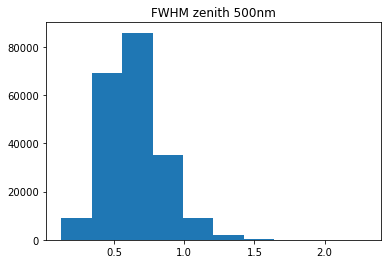

In [5]:
plt.hist(seeing)
plt.title('FWHM zenith 500nm')

In [6]:
sm = SeeingModel()

In [7]:
wavelen_corr = np.power(sm.raw_seeing_wavelength / sm.filter_effwavelens, 0.3)

In [8]:
tiles = [0,25,50,75,100]
print('filter,  0th, 25th, 50th, 75th, 100th')
print('atmpsphere FWHM_5000', np.percentile(seeing, tiles))

filter,  0th, 25th, 50th, 75th, 100th
atmpsphere FWHM_5000 [ 0.12526999  0.50120002  0.6171155   0.75368451  2.29153991]


In [9]:
# OK, I think the seeing from the database is atmosphere FWHM seeing at zenith at 500 nm.

percentiles = []
for i,filtername in enumerate(sm.filter_list):
    # Atmosphere seeing at the wavelength
    seeing_infilt = seeing * wavelen_corr[i]
    # Combine with system fwhm
    seeing_infilt = 1.16 * np.sqrt(sm.fwhm_system_zenith ** 2 + 1.04 * seeing_infilt ** 2)
    percentiles.append(np.percentile(seeing_infilt, tiles))
    

In [10]:
print('filter,  0th, 25th, 50th, 75th, 100th')
for i, row in enumerate(percentiles):
    print(sm.filter_list[i], row)

filter,  0th, 25th, 50th, 75th, 100th
u [ 0.4901537   0.79810743  0.92484749  1.08199082  3.0099189 ]
g [ 0.48605116  0.75687911  0.87071828  1.01278514  2.77839108]
r [ 0.48277741  0.72256111  0.82533556  0.95442371  2.58033387]
i [ 0.48059448  0.69887827  0.79381563  0.91367449  2.44016625]
z [ 0.47914188  0.68272563  0.7722114   0.8856279   2.34262727]
y [ 0.47808185  0.67072463  0.75609906  0.86464278  2.2690001 ]


In [11]:
sm.fwhm_system_zenith

0.39862262855989494